# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*
#### Credits:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` 
module and the dataset generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [13]:
from svm import SVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
%matplotlib inline

RND = 42
N_SAMP = 200
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result.

In [14]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print('Accuracy: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    svm.plot2D(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

Test the SVM on a linearly separable dataset.

     pcost       dcost       gap    pres   dres
 0: -5.6865e+01 -1.2435e+02  5e+02  2e+01  2e+00
 1: -1.6099e+02 -2.0835e+02  3e+02  1e+01  1e+00
 2: -4.4155e+02 -4.9431e+02  3e+02  1e+01  1e+00
 3: -6.8944e+02 -7.4580e+02  3e+02  1e+01  1e+00
 4: -1.6818e+03 -1.7520e+03  3e+02  1e+01  1e+00
 5: -1.3618e+04 -1.3819e+04  7e+02  1e+01  1e+00
 6: -1.3698e+04 -1.5921e+04  4e+03  1e+01  1e+00
 7: -3.5723e+04 -4.2464e+04  1e+04  1e+01  9e-01
 8: -5.2726e+04 -6.5459e+04  2e+04  6e+00  5e-01
 9: -5.6984e+04 -5.9974e+04  4e+03  7e-01  6e-02
10: -5.6992e+04 -5.7027e+04  4e+01  8e-03  6e-04
11: -5.6991e+04 -5.6992e+04  4e-01  8e-05  6e-06
12: -5.6991e+04 -5.6991e+04  4e-03  8e-07  6e-08
13: -5.6991e+04 -5.6991e+04  4e-05  8e-09  6e-10
Optimal solution found.
3 support vectors found out of 150 data points:
1) X: [0.63352971 0.53577468]	y: 1.0
2) X: [0.28203457 0.17743954]	y: -1.0
3) X: [0.88708642 0.77987555]	y: -1.0
Bias of the hyper-plane: 23.732099
Weights of the hyper-plane:
[-238.21047491  23

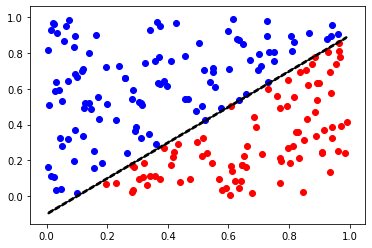

In [15]:
X_train, X_test, y_train, y_test = linear_data_generator(n_samples=N_SAMP,
                                                         n_features=N_FEAT,
                                                         random_state=RND)
svm = SVM()
fit_and_predict(svm, X_train, X_test, y_train, y_test)

Test the SVM on a non-linear separable dataset.

     pcost       dcost       gap    pres   dres
 0: -1.4469e+01 -3.8930e+01  4e+02  2e+01  2e+00
 1: -1.3703e+01 -4.1213e+01  1e+02  4e+00  5e-01
 2: -2.0594e+01 -3.7226e+01  4e+01  2e+00  2e-01
 3: -2.5695e+01 -3.3285e+01  1e+01  1e-01  1e-02
 4: -2.9647e+01 -3.1591e+01  2e+00  2e-02  2e-03
 5: -3.0789e+01 -3.1398e+01  6e-01  1e-14  2e-15
 6: -3.1292e+01 -3.1302e+01  9e-03  7e-15  2e-15
 7: -3.1300e+01 -3.1301e+01  9e-05  9e-15  3e-15
 8: -3.1301e+01 -3.1301e+01  9e-07  3e-15  3e-15
Optimal solution found.
13 support vectors found out of 150 data points:
1) X: [-0.41837984 -0.37600114]	y: 1
2) X: [-0.59662249  0.0820507 ]	y: 1
3) X: [-0.23228731  0.83607726]	y: -1
4) X: [0.45176366 0.43918444]	y: 1
5) X: [-0.18800123 -0.94197532]	y: -1
6) X: [-0.6776143  -0.29964045]	y: -1
7) X: [-0.63223513  0.64210376]	y: -1
8) X: [0.70456055 0.51188204]	y: -1
9) X: [-0.8752793  0.3160447]	y: -1
10) X: [0.55456561 0.71599632]	y: -1
11) X: [0.83579998 0.15894016]	y: -1
12) X: [ 0.64049665 -0.57076481

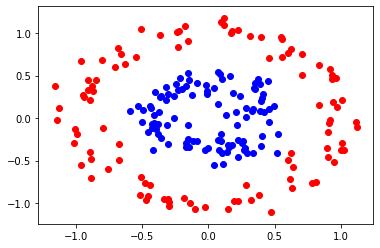

In [16]:
X_train, X_test, y_train, y_test = non_linear_data_generator(n_samples=N_SAMP,
                                                             random_state=RND)
svm = SVM(kernel='rbf')
fit_and_predict(svm, X_train, X_test, y_train, y_test)